In [1]:
!pip install scikit-learn pandas matplotlib seaborn openpyxl


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
def run_classical_models(dataset_path, text_col, label_col, dataset_name="Dataset"):
    print(f"\n==============================")
    print(f"🚀 Running Classical Models on {dataset_name}")
    print(f"==============================")

    # Load dataset
    df = pd.read_excel(dataset_path)

    # Clean text
    def clean_text(text):
        text = str(text)
        text = re.sub(r"http\S+", "", text)
        text = re.sub(r"<.*?>", "", text)
        text = re.sub(r"\s+", " ", text)
        return text.strip()

    df[text_col] = df[text_col].apply(clean_text)
    df = df.dropna(subset=[text_col, label_col])
    df = df[df[text_col].str.strip() != ""]

    # Encode labels
    le = LabelEncoder()
    df['label_id'] = le.fit_transform(df[label_col])
    classes = le.classes_
    print("Classes:", classes)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        df[text_col], df['label_id'], test_size=0.2, random_state=42, stratify=df['label_id']
    )

    # TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
    X_train = vectorizer.fit_transform(X_train)
    X_test  = vectorizer.transform(X_test)

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Linear SVM": LinearSVC(random_state=42)
    }

    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='macro')
        results.append((name, acc, f1))
        print(f"\n=== {name} ===")
        print(f"Accuracy: {acc:.4f} | F1: {f1:.4f}")
        print(classification_report(y_test, preds, target_names=classes))

    results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Macro-F1"]).sort_values(by="Accuracy", ascending=False)
    print("\n📊 Model Performance Summary for", dataset_name)
    print(results_df)

    # Confusion matrix for best model
    best_model_name = results_df.iloc[0]['Model']
    best_model = models[best_model_name]
    best_preds = best_model.predict(X_test)
    cm = confusion_matrix(y_test, best_preds)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{dataset_name} - Confusion Matrix ({best_model_name})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return results_df



🚀 Running Classical Models on BBC
Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']

=== Logistic Regression ===
Accuracy: 0.9865 | F1: 0.9864
               precision    recall  f1-score   support

     business       0.97      0.99      0.98       102
entertainment       0.99      1.00      0.99        77
     politics       0.99      0.98      0.98        84
        sport       0.99      1.00      1.00       102
         tech       1.00      0.96      0.98        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445


=== Linear SVM ===
Accuracy: 0.9888 | F1: 0.9883
               precision    recall  f1-score   support

     business       0.98      0.99      0.99       102
entertainment       0.97      1.00      0.99        77
     politics       0.99      0.99      0.99        84
        sport       1.00      1.00      1.00       102
         tech     

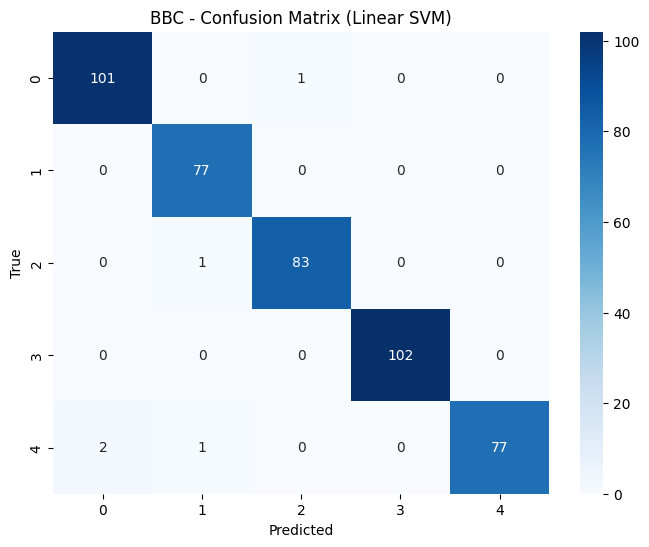

In [8]:
lpc_path = '/content/drive/MyDrive/bbc_data.xlsx'
results_lpc = run_classical_models(lpc_path, text_col='text', label_col='category', dataset_name="BBC")


🚀 Running Classical Models on English LPC
Classes: ['Auto' 'Business' 'Education' 'Elections' 'Entertainment' 'Health'
 'India' 'Lifestyle' 'Science' 'Sports' 'Technology' 'World']

=== Logistic Regression ===
Accuracy: 0.7302 | F1: 0.7267
               precision    recall  f1-score   support

         Auto       0.90      0.53      0.67       335
     Business       0.62      0.73      0.67       782
    Education       0.79      0.74      0.77       726
    Elections       0.77      0.68      0.72       742
Entertainment       0.86      0.83      0.84       527
       Health       0.75      0.83      0.79       802
        India       0.67      0.66      0.67       584
    Lifestyle       0.64      0.83      0.72       683
      Science       0.66      0.54      0.60       460
       Sports       0.93      0.87      0.90       542
   Technology       0.67      0.67      0.67       601
        World       0.71      0.71      0.71       588

     accuracy                           0.

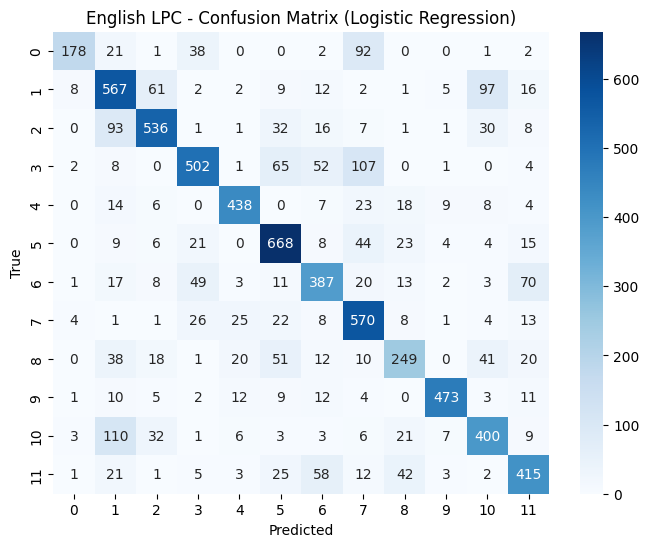

In [9]:
lpc_path = '/content/drive/MyDrive/Machine_Learning_Mini_Project/English_train_lpc.xlsx'  # update if needed
results_lpc = run_classical_models(lpc_path, text_col='text', label_col='labels', dataset_name="English LPC")
